In [1]:
import pandas as pd

In [82]:
df = pd.read_csv("review.csv")

In [74]:
df.head(5)

,review,label
0,Such energy and vitality. You just can't go wr...,1
1,but Thomas Ian Griffith just doesn't have the ...,0
2,Why this film was only released in 4 states is...,1
3,"I'm not here to tell you ""Armored"" is Kubricki...",1
4,Most college students find themselves lost in ...,0


In [59]:
df.shape

(1000, 2)

# 1.Data Cleaning

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [64]:
df.isnull().sum()

review    0
label     0
dtype: int64

In [65]:
df.duplicated().sum()

0

# 2.EDA

In [66]:
df.head()

,review,label
0,Such energy and vitality. You just can't go wr...,1
1,but Thomas Ian Griffith just doesn't have the ...,0
2,Why this film was only released in 4 states is...,1
3,"I'm not here to tell you ""Armored"" is Kubricki...",1
4,Most college students find themselves lost in ...,0


In [67]:
df['label'].value_counts()

0    514
1    486
Name: label, dtype: int64

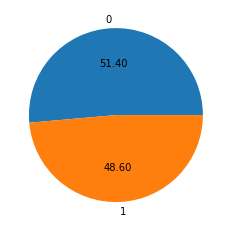

In [68]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['0','1'],autopct="%0.2f")
plt.show()

In [ ]:
#data is balanced

In [83]:
#number of character
df['num_characters_review'] = df['review'].apply(len)

In [84]:
df.head()

,review,label,num_characters_review
0,Such energy and vitality. You just can't go wr...,1,256
1,but Thomas Ian Griffith just doesn't have the ...,0,482
2,Why this film was only released in 4 states is...,1,1343
3,"I'm not here to tell you ""Armored"" is Kubricki...",1,2806
4,Most college students find themselves lost in ...,0,1118


In [85]:
#number of words
df['num_words_review'] = df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [86]:
df.head()

,review,label,num_characters_review,num_words_review
0,Such energy and vitality. You just can't go wr...,1,256,52
1,but Thomas Ian Griffith just doesn't have the ...,0,482,102
2,Why this film was only released in 4 states is...,1,1343,280
3,"I'm not here to tell you ""Armored"" is Kubricki...",1,2806,655
4,Most college students find themselves lost in ...,0,1118,207


In [87]:
#number of sentences
df['num_sentence_review'] = df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [88]:
df.head()

,review,label,num_characters_review,num_words_review,num_sentence_review
0,Such energy and vitality. You just can't go wr...,1,256,52,4
1,but Thomas Ian Griffith just doesn't have the ...,0,482,102,5
2,Why this film was only released in 4 states is...,1,1343,280,16
3,"I'm not here to tell you ""Armored"" is Kubricki...",1,2806,655,42
4,Most college students find themselves lost in ...,0,1118,207,6


In [89]:
#taking label column to last
last_column = df.pop('label')
df.insert(4, 'label', last_column)
df.head()

,review,num_characters_review,num_words_review,num_sentence_review,label
0,Such energy and vitality. You just can't go wr...,256,52,4,1
1,but Thomas Ian Griffith just doesn't have the ...,482,102,5,0
2,Why this film was only released in 4 states is...,1343,280,16,1
3,"I'm not here to tell you ""Armored"" is Kubricki...",2806,655,42,1
4,Most college students find themselves lost in ...,1118,207,6,0


In [91]:
df.columns

Index(['review', 'num_characters_review', 'num_words_review',
       'num_sentence_review', 'label'],
      dtype='object')

In [93]:
df[['num_characters_review', 'num_words_review','num_sentence_review']].describe()

,num_characters_review,num_words_review,num_sentence_review
count,1000.000000,1000.000000,1000.000000
mean,1309.804000,280.068000,10.717000
std,1001.632498,211.662383,7.651631
min,146.000000,34.000000,1.000000
25%,698.750000,151.000000,6.000000
50%,949.000000,205.000000,9.000000
75%,1535.500000,331.000000,13.000000
max,7126.000000,1391.000000,59.000000


In [94]:
#not recommended
df[df['label']==0][['num_characters_review', 'num_words_review','num_sentence_review']].describe()

,num_characters_review,num_words_review,num_sentence_review
count,514.000000,514.000000,514.000000
mean,1264.278210,273.260700,10.801556
std,947.136148,205.943628,7.834765
min,164.000000,39.000000,1.000000
25%,709.000000,155.000000,6.000000
50%,950.500000,203.000000,9.000000
75%,1415.750000,308.000000,13.000000
max,5740.000000,1222.000000,59.000000


In [95]:
#recommended
df[df['label']==1][['num_characters_review', 'num_words_review','num_sentence_review']].describe()

,num_characters_review,num_words_review,num_sentence_review
count,486.000000,486.000000,486.000000
mean,1357.952675,287.267490,10.627572
std,1055.058581,217.527812,7.460078
min,146.000000,34.000000,1.000000
25%,681.000000,146.250000,6.000000
50%,947.500000,207.500000,9.000000
75%,1729.000000,370.000000,13.000000
max,7126.000000,1391.000000,52.000000


In [98]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters_review', ylabel='Count'>

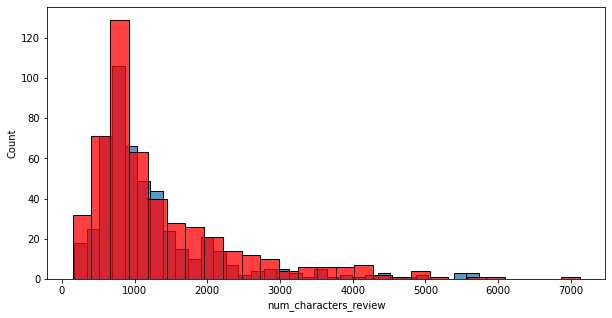

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['label'] == 0]['num_characters_review'])
sns.histplot(df[df['label'] == 1]['num_characters_review'],color='red')

<AxesSubplot:xlabel='num_words_review', ylabel='Count'>

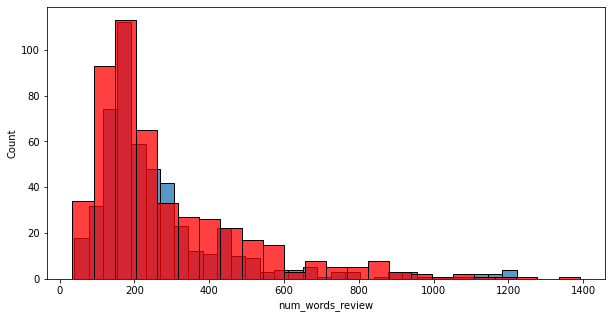

In [101]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['label'] == 0]['num_words_review'])
sns.histplot(df[df['label'] == 1]['num_words_review'],color='red')

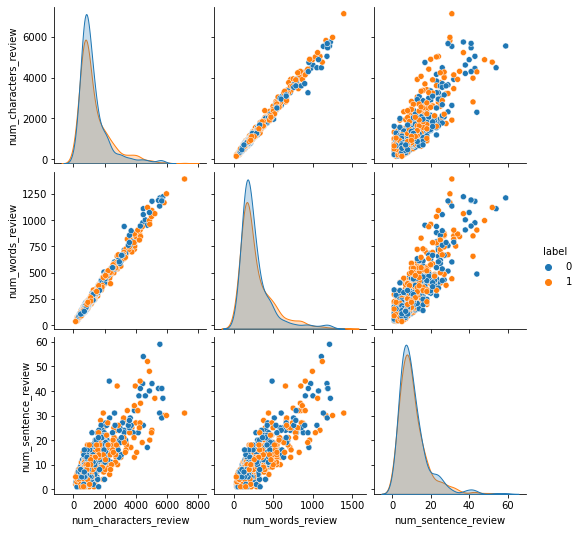

In [102]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

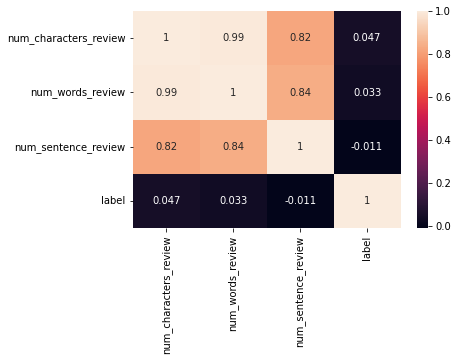

In [103]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing


In [104]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Sumit Kumar
[nltk_data]     Sahoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
def transform_review(movie_review):
    review = re.sub('[^a-zA-Z]', ' ', movie_review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if word not in all_stopwords]
    review = ' '.join(review)
    return review    

In [115]:
transform_review("Such energy and vitality. You just can't go wrong with Busby Berkley films and this certainly must be his best. Of course the choreography is wonderful, but also the banterbetween Cagney and Blondell is so colorful and such a delight. Don't miss this one. ")

'energi vital go wrong busbi berkley film certainli must best cours choreographi wonder also banterbetween cagney blondel color delight miss one'

In [116]:
df['transformed_review'] = df['review'].apply(transform_review)

In [117]:
df.head()

,review,num_characters_review,num_words_review,num_sentence_review,label,transformed_review
0,Such energy and vitality. You just can't go wr...,256,52,4,1,energi vital go wrong busbi berkley film certa...
1,but Thomas Ian Griffith just doesn't have the ...,482,102,5,0,thoma ian griffith polish big buck actor grant...
2,Why this film was only released in 4 states is...,1343,280,16,1,film releas state beyond thought film divin st...
3,"I'm not here to tell you ""Armored"" is Kubricki...",2806,655,42,1,not tell armor kubrickian hitchcockian fellini...
4,Most college students find themselves lost in ...,1118,207,6,0,colleg student find lost bubbl academia cut co...


In [118]:
#taking label column to last
first_column = df.pop('label')
df.insert(0, 'label', last_column)

In [119]:
df.head()

,label,review,num_characters_review,num_words_review,num_sentence_review,transformed_review
0,1,Such energy and vitality. You just can't go wr...,256,52,4,energi vital go wrong busbi berkley film certa...
1,0,but Thomas Ian Griffith just doesn't have the ...,482,102,5,thoma ian griffith polish big buck actor grant...
2,1,Why this film was only released in 4 states is...,1343,280,16,film releas state beyond thought film divin st...
3,1,"I'm not here to tell you ""Armored"" is Kubricki...",2806,655,42,not tell armor kubrickian hitchcockian fellini...
4,0,Most college students find themselves lost in ...,1118,207,6,colleg student find lost bubbl academia cut co...


In [401]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
x = cv.fit_transform(df['transformed_review']).toarray()
y = df['label']

In [402]:
x[0].shape

(3000,)

In [403]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [404]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [405]:
y_pred = lr.predict(x_test)

In [406]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [407]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
c_matrix = confusion_matrix(y_test,y_pred)
print(c_matrix)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[86 14]
 [15 85]]
0.855
0.8585858585858586


# Naive bayes

In [393]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
x_n = cv.fit_transform(df['transformed_review']).toarray()
y_n = df['label']

In [394]:
from sklearn.model_selection import train_test_split
x_n_train,x_n_test,y_n_train,y_n_test = train_test_split(x_n, y_n, test_size = 0.20, random_state = 1)

In [395]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [396]:
gnb.fit(x_n_train,y_n_train)
mnb.fit(x_n_train,y_n_train)
bnb.fit(x_n_train,y_n_train)

BernoulliNB()

In [397]:
y_gnb_predict = gnb.predict(x_n_test)
y_mnb_predict = mnb.predict(x_n_test)
y_bnb_predict = bnb.predict(x_n_test)

In [398]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
c_gnb_matrix = confusion_matrix(y_n_test,y_gnb_predict)
print(c_gnb_matrix)
print(accuracy_score(y_n_test,y_gnb_predict))
print(precision_score(y_n_test,y_gnb_predict))

[[83 17]
 [25 75]]
0.79
0.8152173913043478


In [399]:
c_mnb_matrix = confusion_matrix(y_n_test,y_mnb_predict)
print(c_mnb_matrix)
print(accuracy_score(y_n_test,y_mnb_predict))
print(precision_score(y_n_test,y_mnb_predict))

[[86 14]
 [11 89]]
0.875
0.8640776699029126


In [400]:
c_bnb_matrix = confusion_matrix(y_n_test,y_bnb_predict)
print(c_bnb_matrix)
print(accuracy_score(y_n_test,y_bnb_predict))
print(precision_score(y_n_test,y_bnb_predict))

[[90 10]
 [13 87]]
0.885
0.8969072164948454


# TFIDF

In [429]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
x_tf = tfidf.fit_transform(df['transformed_review']).toarray()
y_tf = df['label']

In [437]:
from sklearn.model_selection import train_test_split
x_tf_train,x_tf_test,y_tf_train,y_tf_test = train_test_split(x_tf, y_tf, test_size = 0.20, random_state = 1)

In [438]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [439]:
gnb.fit(x_tf_train,y_tf_train)
mnb.fit(x_tf_train,y_tf_train)
bnb.fit(x_tf_train,y_tf_train)

BernoulliNB()

In [440]:
y_gnb_predict_tf = gnb.predict(x_tf_test)
y_mnb_predict_tf = mnb.predict(x_tf_test)
y_bnb_predict_tf = bnb.predict(x_tf_test)

In [441]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
c_gnb_matrix_tf  = confusion_matrix(y_tf_test,y_gnb_predict_tf)
print(c_gnb_matrix_tf)
print(accuracy_score(y_tf_test,y_gnb_predict_tf))
print(precision_score(y_tf_test,y_gnb_predict_tf))

[[82 18]
 [23 77]]
0.795
0.8105263157894737


In [442]:
c_mnb_matrix_tf = confusion_matrix(y_tf_test,y_mnb_predict_tf)
print(c_mnb_matrix_tf)
print(accuracy_score(y_tf_test,y_mnb_predict_tf))
print(precision_score(y_tf_test,y_mnb_predict_tf))

[[89 11]
 [11 89]]
0.89
0.89


In [443]:
c_bnb_matrix_tf = confusion_matrix(y_tf_test,y_bnb_predict_tf)
print(c_bnb_matrix_tf)
print(accuracy_score(y_tf_test,y_bnb_predict_tf))
print(precision_score(y_tf_test,y_bnb_predict_tf))

[[90 10]
 [13 87]]
0.885
0.8969072164948454


# find out best features for more accuracy

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [148]:
for i in range(100,12000):
    cv = CountVectorizer(max_features=i)
    x_n = cv.fit_transform(all_review).toarray()
    y_n = df['label']
    x_n_train,x_n_test,y_n_train,y_n_test = train_test_split(x_n, y_n, test_size = 0.10, random_state = 0)
    gnb = GaussianNB()
    gnb.fit(x_n_train,y_n_train)
    y_n_predict = gnb.predict(x_n_test)
    c_n_matrix = confusion_matrix(y_n_test,y_n_predict)
    a_s = accuracy_score(y_n_test,y_n_predict)
    if a_s>0.85:
        print(a_s)
        print(i)
        print(c_n_matrix)
        break
    elif 0.80 < a_s < 0.85:
        print(a_s)
        print(i)
        print(c_n_matrix)
        continue
        

0.81
200
[[32 10]
 [ 9 49]]
0.81
217
[[32 10]
 [ 9 49]]
0.81
252
[[32 10]
 [ 9 49]]
0.81
255
[[32 10]
 [ 9 49]]
0.81
257
[[33  9]
 [10 48]]
0.82
258
[[31 11]
 [ 7 51]]
0.82
259
[[31 11]
 [ 7 51]]
0.82
260
[[31 11]
 [ 7 51]]
0.82
261
[[31 11]
 [ 7 51]]
0.81
262
[[30 12]
 [ 7 51]]
0.81
263
[[30 12]
 [ 7 51]]
0.81
264
[[30 12]
 [ 7 51]]
0.81
265
[[30 12]
 [ 7 51]]
0.81
301
[[29 13]
 [ 6 52]]
0.81
302
[[29 13]
 [ 6 52]]
0.81
303
[[29 13]
 [ 6 52]]
0.81
304
[[29 13]
 [ 6 52]]
0.81
305
[[29 13]
 [ 6 52]]
0.81
306
[[29 13]
 [ 6 52]]
0.81
307
[[29 13]
 [ 6 52]]
0.81
373
[[30 12]
 [ 7 51]]
0.81
374
[[30 12]
 [ 7 51]]
0.81
375
[[30 12]
 [ 7 51]]
0.81
376
[[30 12]
 [ 7 51]]
0.81
379
[[30 12]
 [ 7 51]]
0.81
382
[[30 12]
 [ 7 51]]
0.81
383
[[30 12]
 [ 7 51]]
0.81
384
[[30 12]
 [ 7 51]]
0.81
385
[[30 12]
 [ 7 51]]
0.81
386
[[30 12]
 [ 7 51]]
0.81
388
[[31 11]
 [ 8 50]]
0.81
408
[[30 12]
 [ 7 51]]
0.81
752
[[36  6]
 [13 45]]
0.81
753
[[36  6]
 [13 45]]


# test with other classification algorithm

In [650]:
tfidf1 = TfidfVectorizer(max_features=1000)
X = tfidf1.fit_transform(df['transformed_review']).toarray()
y = df['label']

In [651]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [652]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [653]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [654]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [655]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [656]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.855, 0.865979381443299)

In [657]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.855
Precision -  0.865979381443299
For  KN
Accuracy -  0.635
Precision -  0.6956521739130435
For  GNB
Accuracy -  0.795
Precision -  0.8105263157894737
For  MNB
Accuracy -  0.89
Precision -  0.89
For  BNB
Accuracy -  0.885
Precision -  0.8969072164948454
For  DT
Accuracy -  0.61
Precision -  0.5743243243243243
For  LR
Accuracy -  0.765
Precision -  0.7623762376237624
For  RF
Accuracy -  0.785
Precision -  0.8
For  AdaBoost
Accuracy -  0.78
Precision -  0.7857142857142857
For  BgC
Accuracy -  0.745
Precision -  0.7333333333333333
For  ETC
Accuracy -  0.845
Precision -  0.896551724137931
For  GBDT
Accuracy -  0.8
Precision -  0.8191489361702128
[11:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\E-drive\ineuron\nlp by sridhar\sentiment_analysis\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


For  xgb
Accuracy -  0.76
Precision -  0.76


In [533]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [534]:
performance_df

,Algorithm,Accuracy,Precision
3,MNB,0.800,0.968750
4,BNB,0.800,0.941176
0,SVC,0.870,0.862745
10,ETC,0.835,0.860215
7,RF,0.775,0.823529
12,xgb,0.785,0.776699
6,LR,0.770,0.754717
8,AdaBoost,0.755,0.752475
11,GBDT,0.740,0.744898
1,KN,0.670,0.736111


In [565]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000')

In [566]:
new_df2 = new_df1.merge(temp_df,on='Algorithm')

In [567]:
new_df2

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000,Accuracy_max_ft_2000,Precision_max_ft_2000,Accuracy_max_ft_3000,Precision_max_ft_3000
0,MNB,0.800,0.968750,0.890,0.890000,0.860,0.909091,0.855,0.938272
1,BNB,0.800,0.941176,0.885,0.896907,0.865,0.910112,0.820,0.890244
2,SVC,0.870,0.862745,0.855,0.865979,0.865,0.861386,0.880,0.865385
3,ETC,0.835,0.860215,0.845,0.896552,0.815,0.831579,0.855,0.873684
4,RF,0.775,0.823529,0.785,0.800000,0.795,0.792079,0.775,0.795699
5,xgb,0.785,0.776699,0.760,0.760000,0.785,0.787879,0.780,0.811111
6,LR,0.770,0.754717,0.765,0.762376,0.770,0.759615,0.750,0.735849
7,AdaBoost,0.755,0.752475,0.780,0.785714,0.735,0.737374,0.715,0.704762
8,GBDT,0.740,0.744898,0.800,0.819149,0.780,0.759259,0.765,0.757282
9,KN,0.670,0.736111,0.635,0.695652,0.655,0.746032,0.650,0.708333


In [642]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [643]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [644]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [645]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.88
Precision 0.8958333333333334


In [647]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier

In [648]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [649]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.875
Precision 0.8787878787878788


# Here save the pickle model for MNB.As we saw the dataset is a balanced one so we go for maximum accuracy

In [658]:
import pickle
pickle.dump(tfidf1,open('tfidf_vectorizer.pkl','wb'))
pickle.dump(mnb,open('sentiment_model.pkl','wb'))